# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [104]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:
# Set up lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Index_Count = 0
Count = 1

In [106]:
# Save API_key information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build Query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [107]:
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    city_query = query_url + city
    response = requests.get(city_query).json()
    
    try:
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        
        if Index_Count > 49:
            Index_Count = 0
            Count += 1
        else:
            Index_Count += 1
            
        print(f'Processing Record {Index_Count} of Set {Count} : {city}')
    
    except(KeyError, IndexError):
        print('City not found. Skipping...')
        
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')

Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : da nang
Processing Record 2 of Set 1 : tiksi
Processing Record 3 of Set 1 : qaanaaq
Processing Record 4 of Set 1 : colquechaca
Processing Record 5 of Set 1 : bendigo
Processing Record 6 of Set 1 : mackay
Processing Record 7 of Set 1 : mataura
Processing Record 8 of Set 1 : hobart
Processing Record 9 of Set 1 : boldumsaz
Processing Record 10 of Set 1 : airai
City not found. Skipping...
Processing Record 11 of Set 1 : quatre cocos
City not found. Skipping...
Processing Record 12 of Set 1 : luanda
Processing Record 13 of Set 1 : touros
Processing Record 14 of Set 1 : tecoanapa
Processing Record 15 of Set 1 : rikitea
Processing Record 16 of Set 1 : puerto ayora
Processing Record 17 of Set 1 : butaritari
Processing Record 18 of Set 1 : vaini
Processing Record 19 of Set 1 : mar del plata
Processing Record 20 of Set 1 : thompson
Processing Record 21 of Set 1 : albany
Processing Record 

Processing Record 31 of Set 4 : rio grande
City not found. Skipping...
Processing Record 32 of Set 4 : vestmanna
Processing Record 33 of Set 4 : aquiraz
Processing Record 34 of Set 4 : bambous virieux
Processing Record 35 of Set 4 : tuatapere
Processing Record 36 of Set 4 : atambua
Processing Record 37 of Set 4 : acarau
Processing Record 38 of Set 4 : torbay
Processing Record 39 of Set 4 : vila do maio
Processing Record 40 of Set 4 : cidreira
Processing Record 41 of Set 4 : grindavik
Processing Record 42 of Set 4 : lagoa
Processing Record 43 of Set 4 : college
Processing Record 44 of Set 4 : sheridan
Processing Record 45 of Set 4 : balkhash
Processing Record 46 of Set 4 : liepaja
Processing Record 47 of Set 4 : praia da vitoria
Processing Record 48 of Set 4 : waingapu
Processing Record 49 of Set 4 : kintinku
Processing Record 50 of Set 4 : isangel
Processing Record 0 of Set 5 : high prairie
Processing Record 1 of Set 5 : esperance
Processing Record 2 of Set 5 : laguna
City not found. S

Processing Record 18 of Set 8 : mombetsu
Processing Record 19 of Set 8 : mayya
Processing Record 20 of Set 8 : urumqi
Processing Record 21 of Set 8 : metro
Processing Record 22 of Set 8 : san cristobal
Processing Record 23 of Set 8 : vangaindrano
Processing Record 24 of Set 8 : kutum
Processing Record 25 of Set 8 : hollins
Processing Record 26 of Set 8 : maridi
Processing Record 27 of Set 8 : taltal
City not found. Skipping...
Processing Record 28 of Set 8 : corowa
Processing Record 29 of Set 8 : havelock
Processing Record 30 of Set 8 : uinskoye
Processing Record 31 of Set 8 : batsfjord
Processing Record 32 of Set 8 : samarinda
Processing Record 33 of Set 8 : tabou
Processing Record 34 of Set 8 : kholtoson
Processing Record 35 of Set 8 : san carlos
Processing Record 36 of Set 8 : vredendal
City not found. Skipping...
Processing Record 37 of Set 8 : mul
Processing Record 38 of Set 8 : nkhotakota
Processing Record 39 of Set 8 : davenda
Processing Record 40 of Set 8 : salinopolis
City not

City not found. Skipping...
Processing Record 3 of Set 12 : hangu
Processing Record 4 of Set 12 : babu
------------------------
Data Retrieval Complete
------------------------


Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [108]:
weatherpy_dict = pd.DataFrame({
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp': Max_Temp,
    'Humidity': Humidity,
    'Cloudiness': Cloudiness,
    'Wind Speed': Wind_Speed,
    'Country': Country,
    'Date': Date,
})
weatherpy_data = pd.DataFrame(weatherpy_dict)
weatherpy_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Turan,16.07,108.22,80.60,78,20,4.70,VN,1603760697
1,Tiksi,71.69,128.87,6.26,94,100,5.46,RU,1603760697
2,Qaanaaq,77.48,-69.36,8.64,76,99,8.90,GL,1603760697
3,Colquechaca,-18.67,-66.02,37.87,100,100,4.59,BO,1603760697
4,Bendigo,-36.77,144.28,64.99,45,64,1.01,AU,1603760697
...,...,...,...,...,...,...,...,...,...
560,Emba,48.83,58.14,31.96,90,0,18.45,KZ,1603760773
561,Bonanza,14.03,-84.59,72.88,97,100,0.63,NI,1603760773
562,Jumla,29.27,82.18,40.59,49,0,5.32,NP,1603760774
563,Hangu,39.25,117.79,54.00,25,0,8.95,CN,1603760774


In [124]:
weatherpy_data.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.00,565.00,565.00,565.00,565.00,565.00,5.650000e+02
mean,19.28,16.47,58.44,73.01,52.14,7.75,1.603761e+09
std,33.08,92.53,20.72,20.78,41.30,5.63,7.173000e+01
min,-54.80,-179.17,-0.42,2.00,0.00,0.40,1.603760e+09
25%,-7.84,-65.10,44.60,63.00,1.00,3.42,1.603761e+09
50%,22.67,20.24,64.40,78.00,64.00,6.60,1.603761e+09
75%,47.29,103.31,75.40,88.00,92.00,10.29,1.603761e+09
max,78.22,179.32,90.00,100.00,100.00,35.41,1.603761e+09


In [123]:
weatherpy_data.to_csv('Output/raw_data.csv', index = False, header = True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

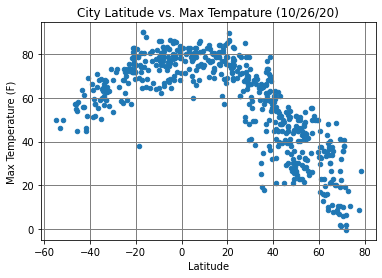

In [111]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Max Temp')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Tempature (10/26/20)')
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

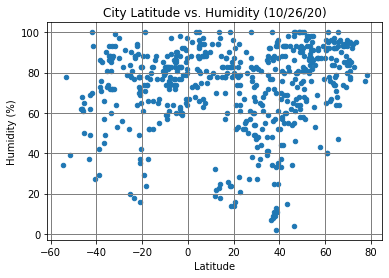

In [112]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Humidity')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/26/20)')
plt.savefig("Images/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

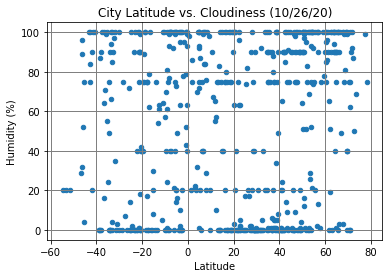

In [113]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Cloudiness')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Cloudiness (10/26/20)')
plt.savefig("Images/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

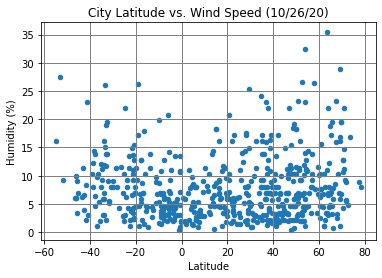

In [114]:
weatherpy_data.plot(kind='scatter', x='Lat', y='Wind Speed')
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Wind Speed (10/26/20)')
plt.savefig("Images/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [30]:
northern_hem = weatherpy_data.loc[weatherpy_data['Lat'] >= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is:  -0.8693354274184423


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


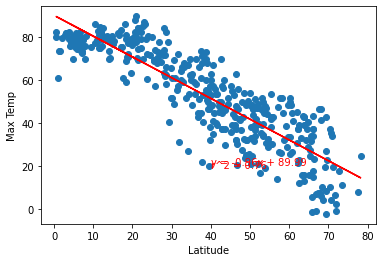

In [115]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is: " , (rvalue))

regress_values = x_values * slope + intercept
northern_hem['regress max temp'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
southern_hem = weatherpy_data.loc[weatherpy_data['Lat'] < 0]

The r-value is: 0.7858648088437945


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


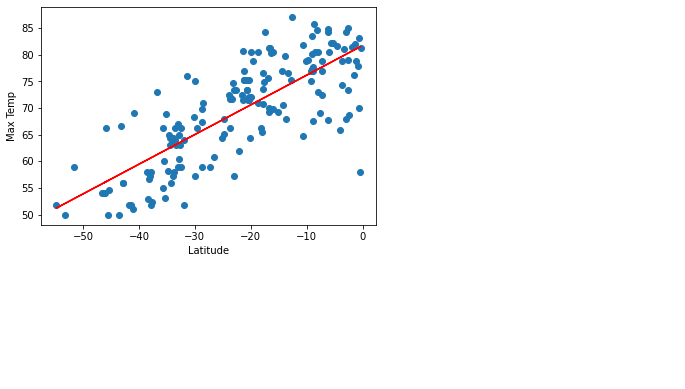

In [116]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Max Temp'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23230964969715334


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


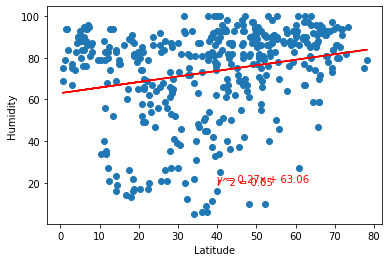

In [117]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
northern_hem['regress Humidity'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16783689213385425


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


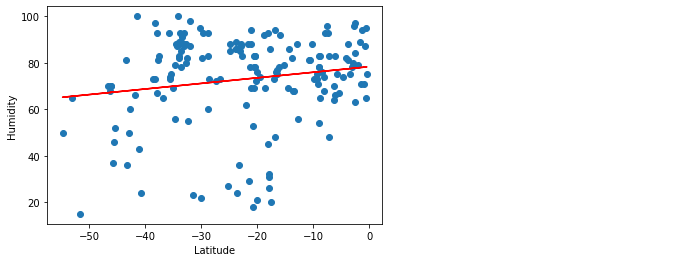

In [118]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Humidity'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Humidity')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18104175989901755


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


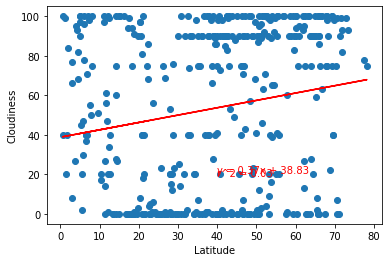

In [119]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

# Get regression values
regress_values = x_values * slope + intercept
northern_hem['regress Cloudiness'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07449081617901088


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


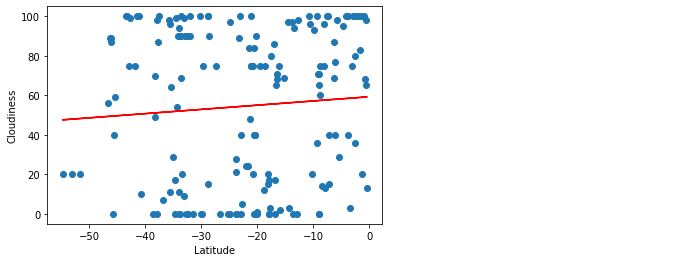

In [120]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Cloudiness'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2189542364643081


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


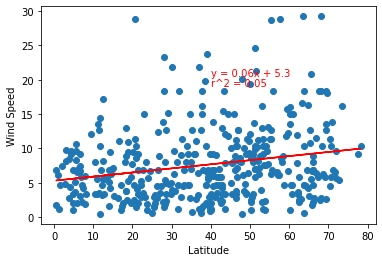

In [121]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
northern_hem['regress Wind Speed'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.35135225034132134


C:\Users\jpegr\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


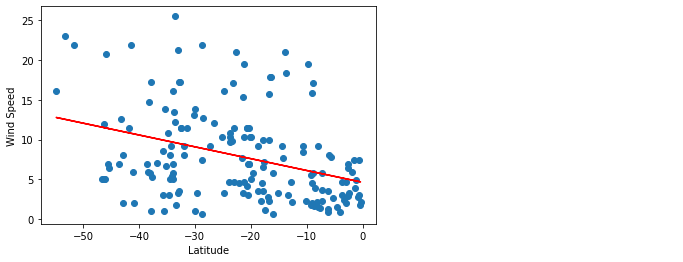

In [122]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']

result = stats.linregress(x_values, y_values)
slope = result.slope
intercept = result.intercept
rvalue = result.rvalue

print("The r-value is:" , (rvalue))

regress_values = x_values * slope + intercept
southern_hem['regress Wind Speed'] = regress_values

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_squared = f'r^2 = {round(rvalue ** 2, 2)}'

plt.annotate(eq, (40, 20.5), color='red')
plt.annotate(r_squared, (40, 19), color='red')
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()